In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

$\textbf{PART I}$

In [2]:
xMin = 1.2345
xMax = 2.3445
nSteps =17

x = np.array([])
diff = xMax-xMin
for i in range(nSteps-1):
    x = np.append(x,xMin + (i/nSteps)*diff)
    if i == nSteps - 2:
        x = np.append(x,xMax)
print(x)  

[1.2345     1.29979412 1.36508824 1.43038235 1.49567647 1.56097059
 1.62626471 1.69155882 1.75685294 1.82214706 1.88744118 1.95273529
 2.01802941 2.08332353 2.14861765 2.21391176 2.3445    ]


$\textbf{PART II}$

In [3]:
H = np.loadtxt('topography_180x360_grid.txt')
ny = H.shape[0]
nx = H.shape[1]
R = 6.371e6
area = 0 
water_area = 0
volume = 0
impact_vol = 0
rised_vol=0
test15 = 0

for ix in range(0,nx): # go through all the longitude
    long = (ix/nx)*360 # going through first longitude at 0
    for iy in range(0,ny): # go through all the latitude
        lat = 90 - (iy/ny) * 180 - 0.5 #minus 0.5 to show that the center point is half of it
        lx = 2 * np.pi * R/nx #x component of r*theta
        ly = np.pi * R /ny # y component of r*theta
        tile= lx * ly * np.cos(lat/180*np.pi) #area of each patch
        if H[iy][ix] < 0:
            water_area = water_area + tile
            volume = volume + np.abs(tile*H[iy][ix])
            new_H = H[iy][ix]+1700 #Ocean leve decreased by 1700 meters
            rised_H = H[iy][ix]-600 #ocean level incrased by 600 meters (subtract because it gets deeper, so more negative)
            test15_H = H[iy][ix]-555 # test to see how much increse in sea level would give 15% volume gain
            
            if new_H < 0:
                impact_vol = impact_vol + np.abs(tile*new_H)
            if rised_H < 0:
                rised_vol = rised_vol + np.abs(tile*rised_H)
                test15 = test15 + np.abs(tile*test15_H)
                
        area = area + tile # add all areas together to get the surface area of the Earth
#         if (ix ==0):
#             print(ix,long,iy,lat,H[iy,ix])

area0 = 4*np.pi*R**2
print('calculated area/actual area is', area/area0)
print('Water covers about',water_area/area * 100, 'percent of Earth surface.')
print('Volume of water on Earth is', volume, 'cubic meter')

perc_vol_lost = ((volume - impact_vol)/volume)*100
print('If the Earths ocean level is reduced by 1700 meters, its water volume will be decreased by',perc_vol_lost,'percent.')

perc_vol_inc = (rised_vol-volume)/volume*100
print('Earth water volume will be increased by',perc_vol_inc, 'percent if the water level is increased by 600 meters.')
test15_inc = (test15-volume)/volume*100
print('By testing 555 meters of sea level increse, we get a',test15_inc,'percent increase in water volume,')
print('So the water volume on Earth will be increased by ~15% if the ocean level is increased by ~555 +/- 1 meters.')

calculated area/actual area is 1.000012692505221
Water covers about 70.94268678858255 percent of Earth surface.
Volume of water on Earth is 1.3367282835616166e+18 cubic meter
If the Earths ocean level is reduced by 1700 meters, its water volume will be decreased by 41.49188477117328 percent.
Earth water volume will be increased by 16.24225527372097 percent if the water level is increased by 600 meters.
By testing 555 meters of sea level increse, we get a 15.024086128192051 percent increase in water volume,
So the water volume on Earth will be increased by ~15% if the ocean level is increased by ~555 +/- 1 meters.


$\textbf{PART III}$

In [4]:
lat_min = 33;
lat_max = 42;
lon_min = -125;
lon_max = -115;

CAC = np.loadtxt('CA_coast_line_no_islands.txt', usecols=(0,1)) 
CAB = np.loadtxt('CA_boundary2.txt', usecols=(0,1)) 
print(CAC.shape,CAB.shape)

CAC1 = np.append( CAC,  [[lon_min,max(CAC[:,1])]],axis=0)
CAC2 = np.append( CAC1, [[lon_min,min(CAC[:,1])]],axis=0)
ocean = CAC2.copy()

plate = np.loadtxt('plate.txt', usecols=(0,1)) 
print(plate.shape)

#lat_UCB = 37+52/60+19.54/3600;
#lat_LAX = 33+56/60+38.89/3600;
lat_LAX = 33.9416
lon_LAX = -118.4085
lat_UCB = 37.8716
lon_UCB = -122.2727

(1282, 2) (1295, 2)
(925, 2)


In [5]:
rate = 35e-3 #rate of movements in meters
years = np.array([1e6,5e6,25e6])
dist_moved = years*rate #distance moved in meters

print('In 1 million years, the plate would have moved',dist_moved[0],'meters toward Northwest.')
print('In 5 million years, the plate would have moved',dist_moved[1],'meters toward Northwest.')
print('In 25 million years, the plate would have moved',dist_moved[2],'meters toward Northwest.')

In 1 million years, the plate would have moved 35000.0 meters toward Northwest.
In 5 million years, the plate would have moved 175000.00000000003 meters toward Northwest.
In 25 million years, the plate would have moved 875000.0000000001 meters toward Northwest.


In [6]:
# displaced x and y components of the plate for each timeframe in meters
#######################################################
x_comps = np.array([])
y_comps = np.array([])
for i in range(3):
    x_comp = np.cos(np.radians(32))*dist_moved[i]
    y_comp = np.sqrt(dist_moved[i]**2 - x_comp**2)
    x_comps = np.append(x_comps,x_comp)
    y_comps = np.append(y_comps,y_comp)
#######################################################
    
R = 6.371e6 #radius of Earth

#converting lat and lon from degrees to meters
#######################################################
lat_convert = (2*np.pi*R)/360 
lon_convert = (np.pi*R*np.cos(35.5))/180

new_plate0 = plate[:,0]*lon_convert
new_plate1 = plate[:,1]*lat_convert
#######################################################


disp0 = np.array([]) #3 stacked arrays with x,y components of the displaced plates in meters
disp1 = np.array([])
for i in range(3):
    if i == 0:
        disp0 = np.append(disp0, new_plate0+x_comps[i])
        disp1 = np.append(disp1, new_plate1+y_comps[i])
    else:
        disp0 = np.vstack((disp0, new_plate0+x_comps[i]))
        disp1 = np.vstack((disp1, new_plate1+y_comps[i]))

disp0_deg = disp0/lon_convert # convert the displaced plates back into degrees
disp1_deg = disp1/lat_convert


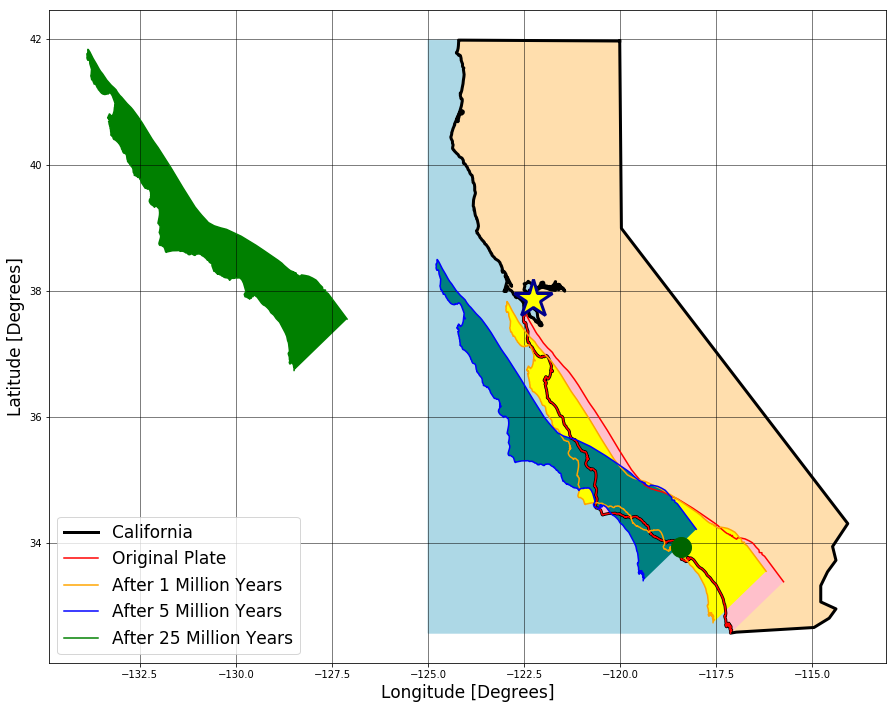

In [7]:


plt.rcParams['figure.figsize'] = [15, 12]

plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
plt.fill(CAB[:,0],CAB[:,1],'navajowhite')

#plt.fill(land[:,0],land[:,1],'-',color='lightgrey')
plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

plt.plot(plate[:,0],plate[:,1],'r-')
plt.fill(plate[:,0],plate[:,1],'pink') #Original

plt.plot(disp0_deg[0],disp1_deg[0],'orange')#1 million years
plt.fill(disp0_deg[0],disp1_deg[0],'yellow')

plt.plot(disp0_deg[1],disp1_deg[1],'b-')# 5 million years
plt.fill(disp0_deg[1],disp1_deg[1],'teal')

plt.plot(disp0_deg[2],disp1_deg[2],'g-') #25 million years
plt.fill(disp0_deg[2],disp1_deg[2],'green')

plt.legend(['California','Original Plate','After 1 Million Years','After 5 Million Years','After 25 Million Years'],fontsize=17)

plt.plot(lon_LAX,lat_LAX,'o',color='darkgreen',ms=20)
plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)

plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.xlabel('Longitude [Degrees]',fontsize=17)
plt.ylabel('Latitude [Degrees]',fontsize=17)
plt.show()

In [8]:
ucb_time = 23.563e6
ucb_dist = ucb_time*rate

ucb_x_comp = np.cos(np.radians(32))*ucb_dist
ucb_y_comp = np.sqrt(ucb_dist**2 - ucb_x_comp**2)


lax0_meter = lon_LAX*lon_convert
lax1_meter = lat_LAX*lat_convert

ucb0_meter = lon_UCB*lon_convert
ucb1_meter = lat_UCB*lat_convert

#print(ucb1_meter/(lax1_meter+ucb_y_comp))#check new ratio (closer to 1, the closer the latitude)

# plt.plot(ucb0_meter,ucb1_meter,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)
# plt.plot(lax0_meter+ucb_x_comp,lax1_meter+ucb_y_comp,'o',color='darkgreen',ms=20)

# plt.plot(new_plate0+x_comps[0], new_plate1+y_comps[0])
# plt.show()

new_lax0 = lax0_meter+ucb_x_comp
new_lax1 = lax1_meter+ucb_y_comp

new_lax0_deg = new_lax0/lon_convert
new_lax1_deg = new_lax1/lat_convert

print('The new latitude of LAX after 23.563 million years is',new_lax1_deg,'degree.')
print('The latitude of UCB is',lat_UCB,'degree.')

print('So the time it taks for LAX to shift to the same latitude as UCB is ~23.563 million years')

The new latitude of LAX after 23.563 million years is 37.87187883553023 degree.
The latitude of UCB is 37.8716 degree.
So the time it taks for LAX to shift to the same latitude as UCB is ~23.563 million years
